# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: ANN for classifying qwerties
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/dudl/?couponCode=202208

In [1]:
# import libraries
import torch
import numpy as np

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')
from DUDL_ANN_classifyQwerties import *

/tmp/ipykernel_23312/2078953877.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


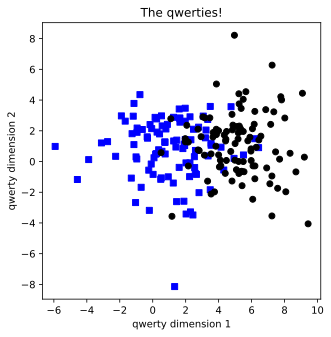

In [2]:
# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [43]:
NUMEPOCHS = 8
NUMOFLRS = 8
lrs = torch.linspace(1e-10,2,NUMOFLRS)
epochs = torch.round(torch.linspace(10,500,NUMEPOCHS))

In [4]:
# accs=calcAccs(lrs,epochs)

In [5]:
# accs=calcAccs(lrs,epochs,True)

In [6]:
# accs=calcAccs(lrs,epochs,False,True)

In [7]:
# accs=calcAccs(lrs,epochs,True,True)

In [8]:
# fig = plt.figure()
# fig.set_figwidth(10)
# plt.imshow(accs, extent=[lrs[0],lrs[-1],epochs[0],epochs[-1]], origin="lower",aspect = .001)
# plt.xticks(lrs)
# plt.yticks(epochs)
# plt.title(f"{accs.max()}")
# plt.colorbar()
# plt.show()

In [9]:
# EPOCH = 500
# losses2d = torch.zeros(NUMOFLRS, EPOCH)
# for j,lr in enumerate(lrs):
#     _, losses = test(lr, EPOCH,TIMES)
#     losses2d[j] = losses

In [10]:
# for i in range(NUMOFLRS):
#     plt.plot(losses2d[i].detach())
# plt.legend(lrs)
# plt.xlabel("epochs")
# plt.ylabel('loss')
# plt.xticks(torch.arange(0, EPOCH+1,100))
# plt.show()

In [11]:
# for i in range(NUMOFLRS):
#     plt.plot(epochs, accs[:,i])
# plt.legend(lrs)
# plt.xlabel("epochs")
# plt.ylabel('accuracy')
# plt.xticks(epochs)
# plt.show()

In [12]:
# model = torch.load("qwerty_multilayer.pt")

In [160]:
classifier = QwertyClassifier(1.1, 400)
classifier.train(data,labels)
predlabels, misclassified, totalacc = classifier.eval(data,labels)
print('Final accuracy: %g%%' %totalacc)

Final accuracy: 87.5%


In [161]:
torch.save(classifier.model.state_dict(),PATH)

In [192]:
classifier = QwertyClassifier(.2, 400)
classifier.model.load_state_dict(torch.load(PATH))
predlabels, misclassified, totalacc = classifier.eval(data,labels)
print('Final accuracy: %g%%' %totalacc)

Final accuracy: 87.5%


In [191]:
classifier.train(data,labels)
predlabels, misclassified, totalacc = classifier.eval(data,labels)
print('Final accuracy: %g%%' %totalacc)

Final accuracy: 87%


In [193]:
# show the losses

plt.plot(classifier.losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

AttributeError: 'QwertyClassifier' object has no attribute 'losses'

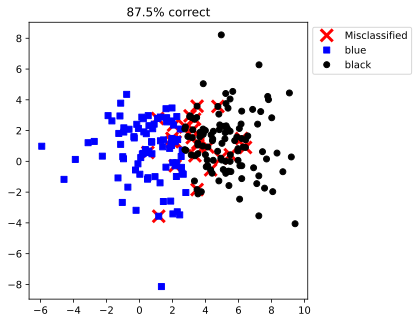

In [194]:
# plot the labeled data
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0] ,data[misclassified,1],'rx',markersize=12,markeredgewidth=3)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0] ,data[np.where(predlabels)[0],1] ,'ko')

plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% correct')
plt.show()

In [ ]:
torch.save(model.state_dict(),PATH)

# Additional explorations

In [ ]:
# 1) It is common in DL to train the model for a specified number of epochs. But you can also train until
#    the model reaches a certain accuracy criterion. Re-write the code so that the model continues training
#    until it reaches 90% accuracy.
#    What would happen if the model falls into a local minimum and never reaches 90% accuracy? Yikes! You can
#    force-quit a process in google-colab by clicking on the top-left 'play' button of a code cell.
# 
# 2) It is intuitive that the model can reach 100% accuracy if the qwerties are more separable. Modify the 
#    qwerty-generating code to get the model to have 100% classification accuracy.
# 